# Transport of Diracs (Unconstrained)
In the relaxation approach, it has been noticed that highly nonsmooth distributions such as Dirac measures cause issues. We will see if it is still the case here for the unconstrained case. 

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sys
sys.path.append('../../..')
from proximal.dynamicUOT import computeGeodesic
from proximal.grids import speed_and_growth
import ipywidgets as widgets
from ipywidgets import interact

# Set up & Geodesic Calculation

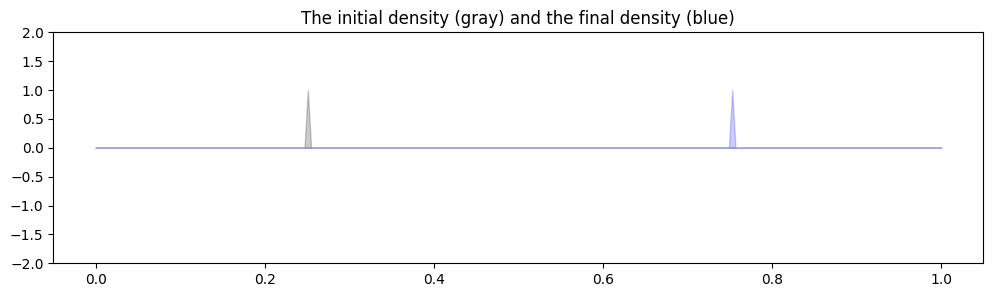

Computing a geodesic for optimal transport with source...
Progress: 99%
Done.


In [3]:
K = 256
X = np.linspace(0, 1, K)  # Discretization of the time-space domain

rho_0 = np.zeros(K)
rho_0[64] = 1
rho_1 = np.roll(rho_0,128)

# Plotting
plt.figure(figsize=(12, 3))
plt.ylim(-2, 2)
plt.title("The initial density (gray) and the final density (blue)")
plt.fill_between(X, rho_0, color="k", alpha=0.2)  # Use fill_between for similar effect to fill in Julia
plt.fill_between(X, rho_1, color="b", alpha=0.2)
plt.show()

T = 15 # number of time steps
ll = (1.0, 1.0) # size of time x space box
x, lists = computeGeodesic(rho_0, rho_1, T, ll, p= 2.0, q=2.0, delta=1.0, niter=3000)

# Plot of the geodesic

In [ ]:
def plot_1D(t, x, v, g, X, rho_0, rho_1, ylim=[-2, 2], title=""):
    plt.figure(figsize=[16, 4])

    # Fill plots
    if rho_0 is not None:
        plt.fill_between(X, rho_0, color="k", alpha=0.2, label=r'$\rho_0$')
    if rho_1 is not None:
        plt.fill_between(X, rho_1, color="b", alpha=0.2, label=r'$\rho_1$')
    plt.fill_between(X, x.V.D[0][t, :], color="r", alpha=0.7, label=r'$\rho_{t}$')

    # Line plots
    plt.plot(X, v[0][t, :], "k", label=r'$v_t$')
    plt.plot(X, g[t, :], "g", label=r'$g_t$')
    plt.title(title)
    plt.axis([0, 1, ylim[0], ylim[1]])
    plt.show()
v,g = speed_and_growth(x.V)
plot_elements3 = [x.copy(), v.copy(), g.copy(), X.copy(), rho_0.copy(), rho_1.copy(), [-2,2], r"(grey) $\rho_0$, (blue) $\rho_1$ (red) $\rho_t$ (green) $g_t$ (dark) $v_t$"]
interact(lambda t: plot_1D(t, *plot_elements3), t=widgets.IntSlider(min=0, max=T-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='t', max=14), Output()), _dom_classes=('widget-interact',…

<function __main__.<lambda>(t)>

 We notice that the mass gets flattened, transported and comes back. This is against the theoretical result as proven by Chizat et al. where the Dirac just transports. This shows that the proximal solver is not suitable for Dirac transportation.